## Создание регрессора одной переменной 

Вам представлены данные о доходах сотрудников участка горячего проката за год, в том числе данные, описывающие специфику рабочих мест.
Доход состоит из оклада, премии, доплат и индивидуальных надбавок. Данных об их размерах не приводится, так как именно их Вам предстоит восстановить.
Задание 
Выявите формулу дохода в целом и его составных частей
Проверьте, что данная формула объясняет доход с точностью до рубля
Выявите зависимости между составными частями дохода

Итоговую формулу напишите, пожалуйста, в теле письма или в Word. Все расчеты и объяснения приложите отдельным файлом.



In [1]:
import pickle
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
file = pd.read_csv("test-case/Задание 5.0 2 версия.xlsx - Sheet 1.csv")
file.head()

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,января 2009,Уборщик,3,Пилигримовые станы,18,580,16 638
1,Абрамов Е. Д.,февраля 2009,Уборщик,3,Пилигримовые станы,18,790,16 638
2,Абрамов Е. Д.,марта 2009,Уборщик,3,Пилигримовые станы,18,820,16 638
3,Абрамов Е. Д.,апреля 2009,Уборщик,3,Пилигримовые станы,18,1200,19 396
4,Абрамов Е. Д.,мая 2009,Уборщик,3,Пилигримовые станы,18,1250,19 790


**continious features (непрерывные признаки)** - доход, вредность, обеъе производства, разряд, месяц (хотя некоторые из этих признаков изменяются дискретно, а не непрерывно, их можно сравнить друг с другом)

**categorical features (категориальные признаки)** - оборудование, профессия, фио. Фиксированный набор значений, который не поддаются абсолютному сравнению (нельзя сравнить тип профессии друг с другом)


In [5]:
cat_features = ['Оборудование', 'Профессия', 'FIO', 'Месяц']
drop_cat = file.copy(deep=True)
drop_cat.drop(labels=cat_features, axis=1, inplace=True) 
# записываем в новую переменную новый датафрейм только с непрерывными признаками. 
# axis=1 (удаление по колонкам), inplace=True (не меняем исходную таблицу)
drop_cat

,Разряд,Вредность (балл.),Объем производства,Доход
0,3,18,580,16 638
1,3,18,790,16 638
2,3,18,820,16 638
3,3,18,1200,19 396
4,3,18,1250,19 790
...,...,...,...,...
2395,4,18,1180,21 800
2396,4,18,1080,20 886
2397,4,18,780,18 783
2398,4,18,1020,20 337


In [7]:
a = drop_cat.loc[0, "Доход"]
type(a)

str

In [9]:
a = drop_cat.loc[0, "Объем производства"]
type(a)

numpy.int64

In [14]:
file.groupby('Разряд')['Доход']

AttributeError: 'SeriesGroupBy' object has no attribute '__str___'

In [6]:
drop_cat.describe()

,Разряд,Вредность (балл.),Объем производства
count,2400.000000,2400.000000,2400.000000
mean,4.900000,15.785000,988.333333
std,1.371417,6.567857,230.982220
min,3.000000,0.000000,580.000000
25%,4.000000,14.750000,805.000000
50%,5.000000,18.000000,985.000000
75%,6.000000,19.000000,1185.000000
max,7.000000,22.000000,1400.000000


In [ ]:
Попарно смотрим зависимости величин 

b = x**y*5

70% строк из столбцов с доходами будут тренировочными данными, 30% строк тестовыми данными

In [25]:
train_data_Y, test_data_Y = file["Доход"][:1679], file["Доход"][1679:2400]
train_data_X1 = file["Объем производства"][:1679]
train_data_X2 = file["Вредность"][:1679]

ValueError: could not convert string to float: '  16\xa0638 '

In [42]:
list(train_data_Y[1:10])

['  16\xa0638 ',
 '  16\xa0638 ',
 '  19\xa0396 ',
 '  19\xa0790 ',
 '  17\xa0426 ',
 '  20\xa0973 ',
 '  19\xa0239 ',
 '  18\xa0451 ',
 '  16\xa0638 ']

In [23]:
t = [i.split(r"  ") for i in train_data_Y]
t

[['', '16\xa0638 '],
 ['', '16\xa0638 '],
 ['', '16\xa0638 '],
 ['', '19\xa0396 '],
 ['', '19\xa0790 '],
 ['', '17\xa0426 '],
 ['', '20\xa0973 '],
 ['', '19\xa0239 '],
 ['', '18\xa0451 '],
 ['', '16\xa0638 '],
 ['', '17\xa0978 '],
 ['', '16\xa0638 '],
 ['', '16\xa0029 '],
 ['', '16\xa0029 '],
 ['', '16\xa0029 '],
 ['', '18\xa0662 '],
 ['', '19\xa0038 '],
 ['', '16\xa0781 '],
 ['', '20\xa0167 '],
 ['', '18\xa0512 '],
 ['', '17\xa0759 '],
 ['', '16\xa0029 '],
 ['', '17\xa0308 '],
 ['', '16\xa0029 '],
 ['', '22\xa0260 '],
 ['', '22\xa0260 '],
 ['', '22\xa0260 '],
 ['', '26\xa0176 '],
 ['', '26\xa0735 '],
 ['', '23\xa0379 '],
 ['', '28\xa0414 '],
 ['', '25\xa0952 '],
 ['', '24\xa0833 '],
 ['', '22\xa0260 '],
 ['', '24\xa0162 '],
 ['', '22\xa0260 '],
 ['', '26\xa0020 '],
 ['', '26\xa0020 '],
 ['', '26\xa0020 '],
 ['', '30\xa0562 '],
 ['', '31\xa0211 '],
 ['', '27\xa0318 '],
 ['', '33\xa0157 '],
 ['', '30\xa0302 '],
 ['', '29\xa0005 '],
 ['', '26\xa0020 '],
 ['', '28\xa0226 '],
 ['', '26\xa0

TypeError: cannot perform reduce with flexible type

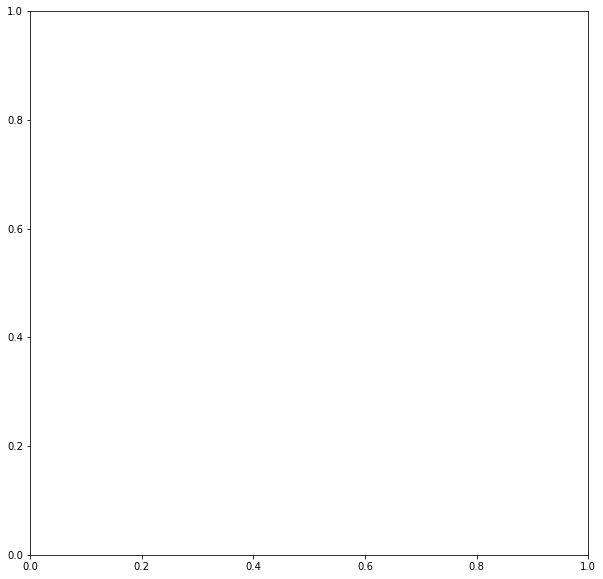

In [40]:
plt.boxplot(list(train_data_Y[1:10]))

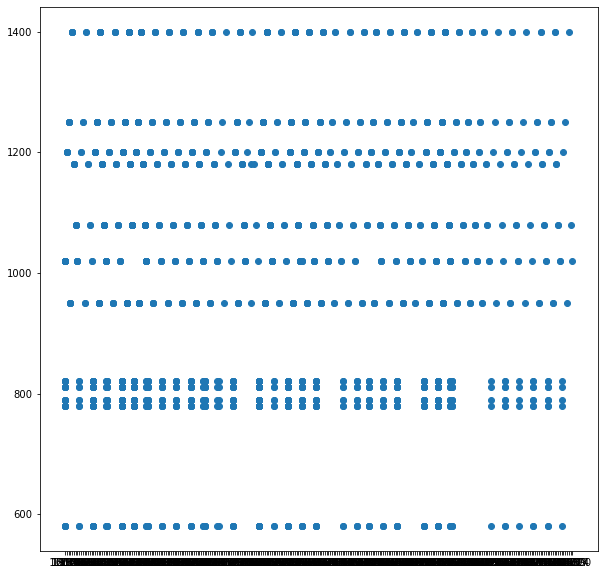

In [37]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(train_data_Y, train_data_X)

In [24]:
#plt.scatter(train_data_X, train_data_Y)
i = 0
while i<=70:
    plt.plot(train_data_X[i:i+10], train_data_Y[i:i+10])
    i+=10

NameError: name 'train_data_X' is not defined

Линейная регрессия - зависимость дохода от объема производства

In [11]:
regression = linear_model.LinearRegression()
regression.fit(train_data_X, train_data_Y)

ValueError: Expected 2D array, got 1D array instead:
array=[ 580  790  820 ... 1080  780 1020].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.